In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [146]:
data = pd.read_csv('corona.csv')
data.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [180]:
#there are no missing values in this data set
data.isnull().sum().sum()

0

In [147]:
#we will create a new column of Active cases which can be an important factor for predicting the deaths
#and also converting the Date column into datetime format,and creating a seperate year
#month and weekday column,then I will take out weekdays and weekends for 
#our prediction.

data['Active'] = data['Confirmed'] - data['Recovered'] - data['Deaths']
data['Date']= pd.to_datetime(data['Date'])
data['year'] = pd.DatetimeIndex(data['Date']).year
data['month'] = pd.DatetimeIndex(data['Date']).month

In [148]:
#creating additional column of day which will include 2 classes, weekday and weekend.
data['Day'] = data['Date'].dt.weekday
data['Day'] = data['Day'].replace([0,1,2,3,4],0)
data['Day'] = data['Day'].replace([5,6],1)
data.head()

,Date,Country,Confirmed,Recovered,Deaths,Active,year,month,Day
0,2020-01-22,Afghanistan,0,0,0,0,2020,1,0
1,2020-01-22,Albania,0,0,0,0,2020,1,0
2,2020-01-22,Algeria,0,0,0,0,2020,1,0
3,2020-01-22,Andorra,0,0,0,0,2020,1,0
4,2020-01-22,Angola,0,0,0,0,2020,1,0


In [149]:
data.shape

(23688, 9)

In [152]:
data_by_date = data.groupby('Date').sum().reset_index()
data_by_date.head()

,Date,Confirmed,Recovered,Deaths,Active,year,month,Day
0,2020-01-22,555,28,17,510,379760,188,0
1,2020-01-23,654,30,18,606,379760,188,0
2,2020-01-24,941,36,26,879,379760,188,0
3,2020-01-25,1434,39,42,1353,379760,188,188
4,2020-01-26,2118,52,56,2010,379760,188,188


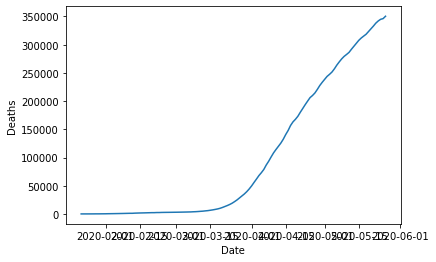

In [154]:
sns.lineplot(x='Date',y='Deaths',data=data_by_date)

In [134]:
data.year.unique()

array([2020], dtype=int64)

In [135]:
#dropping the date column as we do not need that, we have already created seperate columns for Date, month
#removing the year column as well as all the data is from same year
data.drop('Date',axis=1,inplace=True)
data.drop('year',axis=1,inplace=True)

In [136]:
data.head()

,Country,Confirmed,Recovered,Deaths,Active,month,Day
0,Afghanistan,0,0,0,0,1,0
1,Albania,0,0,0,0,1,0
2,Algeria,0,0,0,0,1,0
3,Andorra,0,0,0,0,1,0
4,Angola,0,0,0,0,1,0


In [137]:
Total_by_month = data.groupby('month').sum().reset_index()

In [138]:
Total_by_month.head()

,month,Confirmed,Recovered,Deaths,Active,Day
0,1,38534,844,889,36801,376
1,2,1671783,380794,46898,1244091,1692
2,3,8899917,2706089,396863,5796965,1692
3,4,63046693,16322390,4291044,42433259,1504
4,5,115121451,41747602,7746343,65627506,1504


<Figure size 1080x720 with 0 Axes>

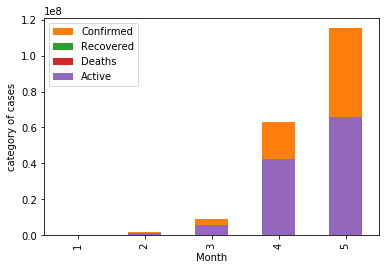

In [139]:
#plotting the number of cases month wise
plt.figure(figsize=(15,10))
ax = Total_by_month.plot(kind='bar',x='month',y='Confirmed',color='C1')
Total_by_month.plot(kind='bar',x='month',y='Recovered',color='C2',ax=ax)
Total_by_month.plot(kind='bar',x='month',y='Deaths',color='C3',ax=ax)
Total_by_month.plot(kind='bar',x='month',y='Active',color='C4',ax=ax)
plt.xlabel('Month')
plt.ylabel('category of cases')
plt.show()

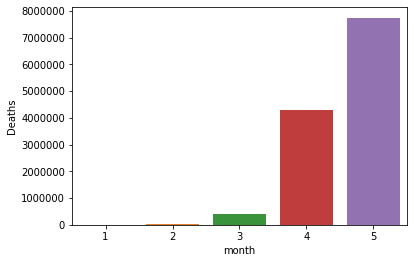

In [140]:
#checking the relationship between the months and the deaths

sns.barplot(x='month',y='Deaths',data=Total_by_month)

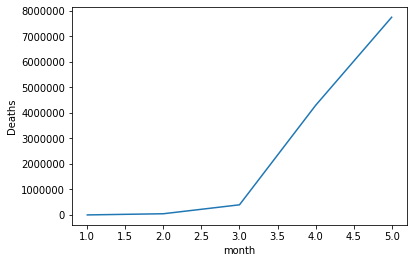

In [141]:
sns.lineplot(x='month',y='Deaths',data=Total_by_month)

It is clear that with the increase of the month, death rate were also increasing and from march the rate of death increased drastically

In [142]:
#checking total cases grouped by day
#0 - weekdays (mon-fri)
#1 - weekends (sat-sun)
Total_by_day = data.groupby('Day').sum().reset_index()
Total_by_day.head()

,Day,Confirmed,Recovered,Deaths,Active,month
0,0,133956187,43336858,8860941,81758388,54896
1,1,54822191,17820861,3621096,33380234,22372


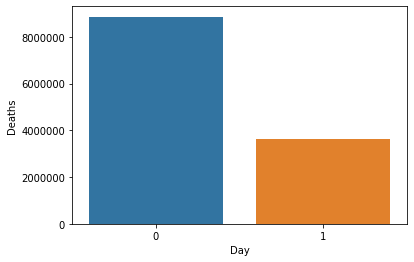

In [143]:
sns.barplot(x='Day',y='Deaths',data=Total_by_day)

here we can see that during weekdays the deaths were more

In [144]:
deaths_by_country = data.groupby('Country').sum().reset_index()
deaths_by_country.head()

,Country,Confirmed,Recovered,Deaths,Active,month,Day
0,Afghanistan,185236,20845,4669,159722,411,36
1,Albania,41253,25688,1629,13936,411,36
2,Algeria,240070,107345,23232,109493,411,36
3,Andorra,41573,20751,2219,18603,411,36
4,Angola,1892,506,131,1255,411,36


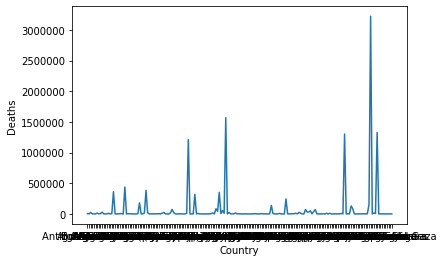

In [156]:
sns.lineplot(x='Country',y='Deaths',data=deaths_by_country)

# ANALYSING DATA OF INDIA

In [159]:
Ind = data[data['Country']=='India']
Ind

,Date,Country,Confirmed,Recovered,Deaths,Active,year,month,Day
79,2020-01-22,India,0,0,0,0,2020,1,0
267,2020-01-23,India,0,0,0,0,2020,1,0
455,2020-01-24,India,0,0,0,0,2020,1,0
643,2020-01-25,India,0,0,0,0,2020,1,1
831,2020-01-26,India,0,0,0,0,2020,1,1
...,...,...,...,...,...,...,...,...,...
22827,2020-05-22,India,124794,51824,3726,69244,2020,5,0
23015,2020-05-23,India,131423,54385,3868,73170,2020,5,1
23203,2020-05-24,India,138536,57692,4024,76820,2020,5,1
23391,2020-05-25,India,144950,60706,4172,80072,2020,5,0


In [160]:
Ind_total_by_month = Ind.groupby('month').sum().reset_index()
Ind_total_by_month

,month,Confirmed,Recovered,Deaths,Active,year,Day
0,1,2,0,0,2,20200,2
1,2,84,42,0,42,58580,9
2,3,10252,818,226,9208,62620,9
3,4,447607,85811,14417,347379,60600,8
4,5,2219095,816870,69336,1332889,52520,8


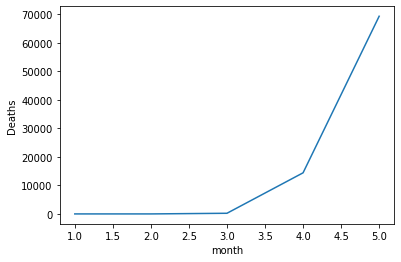

In [162]:
#ploting line plot to showthe increase of number of deaths on monthly basis
sns.lineplot(x='month',y='Deaths',data=Ind_total_by_month)

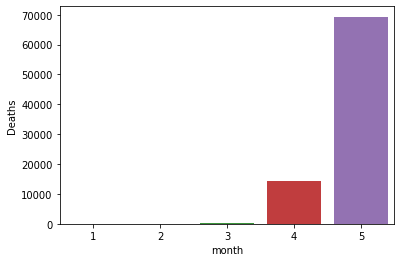

In [163]:
sns.barplot(x='month',y='Deaths',data=Ind_total_by_month)

The above graphs shows that from third month Deaths were recorded and from 4th month the rate of death increased and in the 5th month it was on its high

# 10 countries having the most number of cases.

In [172]:
worst_10 = data.groupby('Country').sum().reset_index().nlargest(10,'Confirmed')
worst_10

,Country,Confirmed,Recovered,Deaths,Active,year,month,Day
174,US,57098767,8428678,3221969,45448120,254520,411,36
85,Italy,11896347,4354815,1568276,5973256,254520,411,36
158,Spain,11890691,5770271,1302010,4818410,254520,411,36
178,United Kingdom,9150537,43829,1329006,7777702,254520,411,36
66,Germany,9046257,6102898,319666,2623693,254520,411,36
36,China,8871610,6776464,384657,1710489,254520,411,36
62,France,8746538,2519190,1209634,5017714,254520,411,36
140,Russia,7459042,1586423,70758,5801861,254520,411,36
23,Brazil,6701409,2666743,438199,3596467,254520,411,36
173,Turkey,5868751,2895790,152495,2820466,254520,411,36


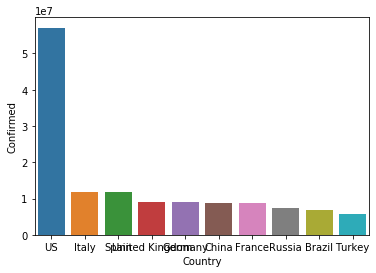

In [173]:
sns.barplot(x='Country',y='Confirmed',data=worst_10)

The graph shows , US has the most number of confirmed cases with in the period of 5 months of year 2020

# Lets check the rise in the cases in US

In [176]:
US = data[data['Country']=='US']
US_month = US.groupby('month').sum().reset_index()

In [177]:
US_month

,month,Confirmed,Recovered,Deaths,Active,year,Day
0,1,38,0,0,38,20200,2
1,2,622,88,1,533,58580,9
2,3,1088020,19730,25277,1043013,62620,9
3,4,19523504,1747977,1015864,16759663,60600,8
4,5,36486583,6660883,2180827,27644873,52520,8


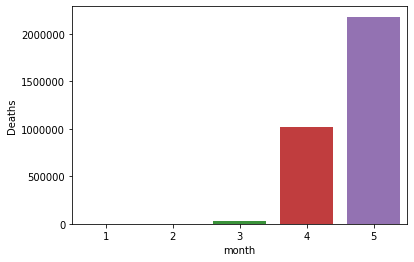

In [178]:
sns.barplot(x='month',y='Deaths',data=US_month)

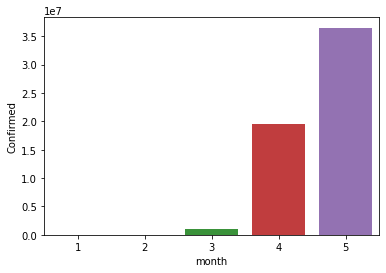

In [179]:
sns.barplot(x='month',y='Confirmed',data=US_month)

From the above data it can see seen that US had confirmed cases in the 1st month and till now has the most number of Active, confirmed and death cases